# IBM HR Employee Attrition

### Logistic Regression Classification

| Model Name | Accuaracy | Kappa Score | ROC AUC Curve value |
| ------------ | ---------------- | ---------------- | ---------------- | 
| Logistic Regression with normal data | 85.32% | 0.08 | 0.53 |	
| Logistic Regression with smote data | 73.36% | 0.14 | 0.59 |

> Seems like the model with normal data performs best

Logistic Regression with SMOTE data showed a decrease in accuracy (73.36%) but improved the Kappa score (0.14) and ROC AUC (0.59), indicating better handling of imbalanced data.

In [1]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")
import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
from imblearn.over_sampling import SMOTE
import numpy as np
n=40
import warnings
warnings.filterwarnings('ignore')
import time
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
%matplotlib inline
r_state=52
print("==================== Packages Loaded ======================")

==================== BLOCK 1 Started! ======================
==================== Packages Loaded ======================


In [2]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('MainEncodedData.csv')
del df['Unnamed: 0']
df.info()
print("==================== Data Loaded In ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   BusinessTravel                     1470 non-null   int64
 3   DailyRate                          1470 non-null   int64
 4   DistanceFromHome                   1470 non-null   int64
 5   Education                          1470 non-null   int64
 6   EmployeeCount                      1470 non-null   int64
 7   EmployeeNumber                     1470 non-null   int64
 8   EnvironmentSatisfaction            1470 non-null   int64
 9   HourlyRate                         1470 non-null   int64
 10  JobInvolvement                     1470 non-null   int64
 11  JobLevel                 

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,...,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,...,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,...,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,...,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,...,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [4]:
df.shape

(1470, 51)

In [5]:
#start_time = time.time()

train, test = sklearn.model_selection.train_test_split(df, train_size = 0.75,random_state=r_state)
train, val = sklearn.model_selection.train_test_split(train, train_size = 0.75,random_state=r_state)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Validation Set :",val['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[1], axis = 1)
x_val=val.drop(val.columns[1], axis = 1)
x_test=test.drop(test.columns[1], axis = 1)
y_train=train['Attrition']
y_val=val['Attrition']
y_test=test['Attrition']

For Main Data Set : 1470
For Train Set : 826
For Validation Set : 276
For Test Set : 368


Acc Train: 0.837772, Acc Val:0.829710
Acc Train: 0.837772, Acc Val:0.829710
Acc Train: 0.845036, Acc Val:0.833333
Acc Train: 0.852300, Acc Val:0.833333
Acc Train: 0.883777, Acc Val:0.836957
Acc Train: 0.886199, Acc Val:0.836957
Acc Train: 0.906780, Acc Val:0.833333
Acc Train: 0.906780, Acc Val:0.840580
Acc Train: 0.905569, Acc Val:0.855072
Acc Train: 0.906780, Acc Val:0.840580
Acc Train: 0.903148, Acc Val:0.833333
Acc Train: 0.901937, Acc Val:0.836957
Acc Train: 0.904358, Acc Val:0.851449


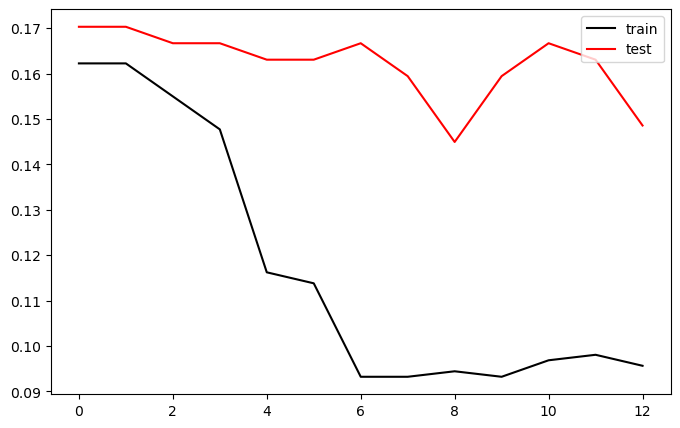

In [6]:
C_values = [0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0,500.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = LogisticRegression(C=C_val,max_iter=10000,random_state=52)
    clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_val,y_val)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test)
    #val_error.append(1-score_val) 
    print("Acc Train: %f, Acc Val:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=10,max_iter=750,random_state=52)
logreg.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=750, random_state=52)

In [8]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Setup KFold cross-validation with shuffling
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=52)

# Model and scoring
modelCV = LogisticRegression(max_iter=1000)  # Add max_iter to ensure convergence
scoring = 'accuracy'

# Perform cross-validation
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)

# Output results
print("10-fold cross-validation average accuracy: %.3f" % (results.mean()))


10-fold cross-validation average accuracy: 0.862


In [9]:
logreg = LogisticRegression(random_state=52,C=10)
logreg.fit(x_train, y_train)

LogisticRegression(C=10, random_state=52)

In [10]:
logreg = LogisticRegression(random_state=52,C=10)
logreg.fit(x_train, y_train)
start_time = time.time()

model=logreg
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True         0   1
Predicted         
0          311  53
1            1   3
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       312
           1       0.75      0.05      0.10        56

    accuracy                           0.85       368
   macro avg       0.80      0.53      0.51       368
weighted avg       0.84      0.85      0.80       368

0.8532608695652174
Duration: --- 0.00015004078547159832 Minutes ---


ROC AUC: 0.53


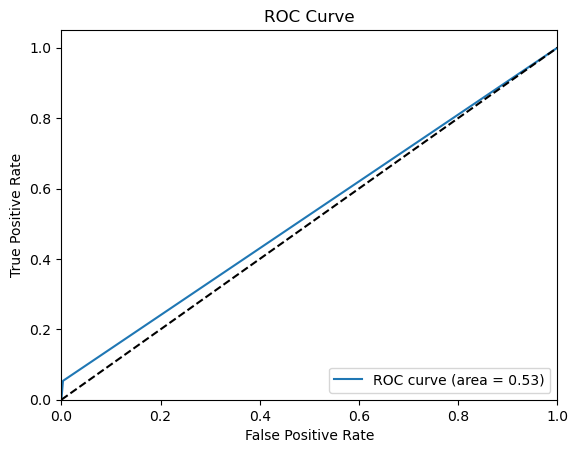

In [11]:
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [12]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred)

0.08136094674556205

## Now on smote Data

#### Since our data set is imbalanced lets try balancing it

In [13]:
y_train.value_counts()

0    692
1    134
Name: Attrition, dtype: int64

In [14]:
from imblearn.over_sampling import SMOTE, SVMSMOTE

# Use SVMSMOTE for 'svm' variant of SMOTE
sm = SVMSMOTE(random_state=r_state, k_neighbors=9, sampling_strategy=1)  # Use 'sampling_strategy' instead of 'ratio'

# Fit and resample the data
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

# Convert to DataFrame
x_train_smote = pd.DataFrame(x_train_smote, columns=x_train.columns)
y_train_smote = pd.DataFrame(y_train_smote, columns=['Attrition'])


In [15]:
y_train_smote['Attrition'].value_counts()

0    692
1    495
Name: Attrition, dtype: int64

Acc Train: 0.754844, Acc Val:0.721014
Acc Train: 0.760741, Acc Val:0.735507
Acc Train: 0.823083, Acc Val:0.782609
Acc Train: 0.844987, Acc Val:0.793478
Acc Train: 0.901432, Acc Val:0.818841
Acc Train: 0.900590, Acc Val:0.811594
Acc Train: 0.918281, Acc Val:0.826087
Acc Train: 0.915754, Acc Val:0.826087
Acc Train: 0.913227, Acc Val:0.826087
Acc Train: 0.906487, Acc Val:0.833333
Acc Train: 0.913227, Acc Val:0.818841
Acc Train: 0.909014, Acc Val:0.815217
Acc Train: 0.907329, Acc Val:0.829710


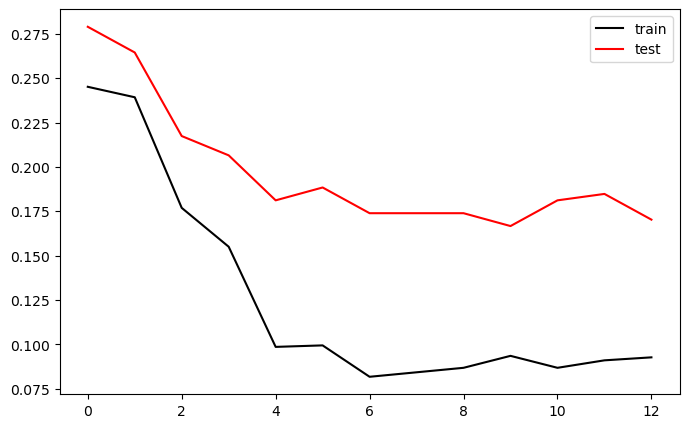

True         0   1
Predicted         
0          249  35
1           63  21
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       312
           1       0.25      0.38      0.30        56

    accuracy                           0.73       368
   macro avg       0.56      0.59      0.57       368
weighted avg       0.78      0.73      0.75       368

0.7336956521739131
Duration: --- 0.00013666550318400066 Minutes ---
ROC AUC: 0.59


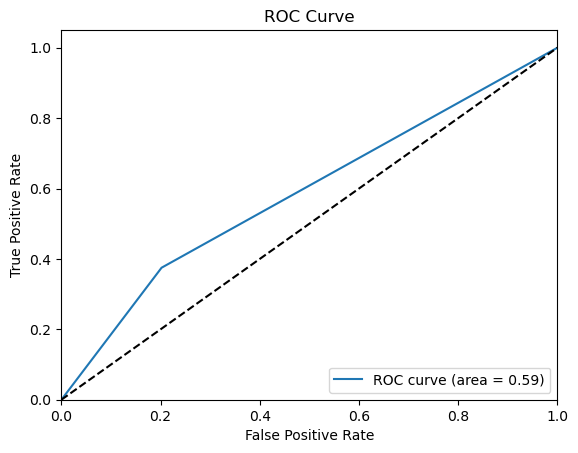

Kappa score is :0.1436170212765958


In [16]:
# Finding the best c value
C_values = [0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0,500.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = LogisticRegression(C=C_val,max_iter=10000,random_state=52)
    clf.fit(x_train_smote, y_train_smote)
    score_train = clf.score(x_train_smote, y_train_smote)
    score_test = clf.score(x_val,y_val)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test)
    #val_error.append(1-score_val) 
    print("Acc Train: %f, Acc Val:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()

logreg = LogisticRegression(random_state=r_state,C=100)
logreg.fit(x_train_smote, y_train_smote)
start_time = time.time()

model=logreg
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import cohen_kappa_score
print("Kappa score is :"+str(cohen_kappa_score(y_test,pred)))
